<a href="https://colab.research.google.com/github/dipangshuk20/image-_processing/blob/main/conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import cv2
import torch
from PIL import Image
import glob
import math
from skimage.metrics import structural_similarity as ssim
import argparse
import imutils
from math import log10, sqrt
from skimage.metrics import mean_squared_error
from skimage.io import imread
import random
import skimage
import csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.5/593.5 kB 9.2 MB/s eta 0:00:00


In [ ]:
!mkdir newz

In [ ]:
!mkdir gaussian_noise
!mkdir median_noise
!mkdir noise_combined
!mkdir median_filter
!mkdir gaussain_filter
!mkdir bilateral_filter
!mkdir wiener_filter
!mkdir mean_filter
!mkdir combination_of_all

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 15965, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 15965 (delta 83), reused 113 (delta 75), pack-reused 15831
Receiving objects: 100% (15965/15965), 14.60 MiB | 17.30 MiB/s, done.
Resolving deltas: 100% (10952/10952), done.


In [ ]:
!cd yolov5

In [ ]:
!pip install -r yolov5/requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
!ls yolov5

benchmarks.py	 data	     LICENSE	      requirements.txt	tutorial.ipynb
CITATION.cff	 detect.py   models	      segment		utils
classify	 export.py   README.md	      setup.cfg		val.py
CONTRIBUTING.md  hubconf.py  README.zh-CN.md  train.py


In [ ]:
!python yolov5/train.py --data custom.yaml --weights yolov5.pt

train: weights=yolov5.pt, cfg=, data=custom.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "/content/yolov5/train.py", line 642, in <module>
    main(opt)
  File "/content/yolov5/train.py", line 506, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "/content/yolov5/utils/general.py", line 458, in check_f

In [ ]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ls '/content/gdrive/MyDrive/kaggle'

Aaron_Eckhart_0001.jpg		       Alberto_Sordi_0001.jpg
Aaron_Guiel_0001.jpg		       Albert_Pujols_0001.jpg
Aaron_Patterson_0001.jpg	       Albrecht_Mentz_0001.jpg
Aaron_Peirsol_0001.jpg		       Albrecht_Mentz_0002.jpg
Aaron_Peirsol_0002.jpg		       Al_Cardenas_0001.jpg
Aaron_Peirsol_0003.jpg		       Al_Davis_0001.jpg
Aaron_Peirsol_0004.jpg		       Al_Davis_0002.jpg
Aaron_Pena_0001.jpg		       Aldo_Paredes_0001.jpg
Aaron_Sorkin_0001.jpg		       Aldo_Paredes_0002.jpg
Aaron_Sorkin_0002.jpg		       Alec_Baldwin_0001.jpg
Aaron_Tippin_0001.jpg		       Alec_Baldwin_0002.jpg
Abba_Eban_0001.jpg		       Alec_Baldwin_0003.jpg
Abbas_Kiarostami_0001.jpg	       Alec_Baldwin_0004.jpg
Abdel_Aziz_Al-Hakim_0001.jpg	       Alecos_Markides_0001.jpg
Abdel_Madi_Shabneh_0001.jpg	       Alejandro_Atchugarry_0001.jpg
Abdel_Nasser_Assidi_0001.jpg	       Alejandro_Atchugarry_0002.jpg
Abdel_Nasser_Assidi_0002.jpg	       Alejandro_Avila_0001.jpg
Abdoulaye_Wade_0001.jpg		       Alejandro_Avila_0002.jpg
Abdoulaye_Wad

# Matlab to Python Conversion

In [ ]:
def up1ShiftImage(temp_x = None):
    #shift the entire image to left />
    out = temp_x
    out = cellfun(lambda x = None: x * 0,out,'un',0)
    max_val = np.amax(np.amax(cell2mat(temp_x)))
    for i in np.arange(1,temp_x.shape[1-1]+1).reshape(-1):
        for j in np.arange(1,temp_x.shape[2-1]+1).reshape(-1):
            if (j == 1) or (i == temp_x.shape[2-1]):
                tmp = np.zeros((temp_x[1,1].shape,temp_x[1,1].shape))
                tmp[1] = 1
                out[i,j] = max_val * tmp
            else:
                tmp = temp_x[i,j]
                out[i,j] = temp_x[i + 1,j - 1]

    return out

In [ ]:
def rightShiftImage(temp_x = None):
    #shift the entire image to right -->
    out = temp_x
    out = cellfun(lambda x = None: x * 0,out,'un',0)
    max_val = np.amax(np.amax(cell2mat(temp_x)))
    for i in np.arange(1,temp_x.shape[1-1]+1).reshape(-1):
        for j in np.arange(1,temp_x.shape[2-1]+1).reshape(-1):
            if j == 1:
                tmp = np.zeros((temp_x[1,1].shape,temp_x[1,1].shape))
                tmp[1] = 1
                out[i,j] = max_val * tmp
            else:
                tmp = temp_x[i,j]
                out[i,j] = temp_x[i,j - 1]

    return out

In [ ]:
def selfTensor(x = None,n = None):
    val = x
    for i in np.arange(1,n - 1+1).reshape(-1):
        val = kron(val,x)

    return val

In [ ]:
def comparator2(x = None,y = None):
    x1 = find(x == np.amax(x))
    y1 = find(y == np.amax(y))
    if x1 >= y1:
        a = 1
    else:
        a = 0

    return a

In [ ]:
def computeComp(temp = None):
    #temp = tmp_x;
    D1 = down1ShiftImage(temp)

    D2 = downShiftImage(temp)

    D3 = down2ShiftImage(temp)

    D4 = leftShiftImage(temp)
    D5 = up2ShiftImage(temp)
    D6 = upShiftImage(temp)
    D7 = up1ShiftImage(temp)
    D8 = rightShiftImage(temp)
    out1 = np.zeros((D1.shape,D1.shape))
    out2 = D1
    out2 = cellfun(lambda x = None: x * 0,out2,'un',0)
    MaxVecVal = np.amax(D1[1,1])
    n = log2(np.asarray(D1[1,1]).size)
    for i in np.arange(1,D1.shape[1-1] - 1+1).reshape(-1):
        for j in np.arange(1,D1.shape[2-1] - 1+1).reshape(-1):
            #Comparing and storing in
            t = 0
            #x = temp{i+1,j+1};
#             t1 = 1 * comparator2(D1{i,j},x);
#             t2 = 2 * comparator2(D2{i,j},x);
#             t3 = 4 * comparator2(D3{i,j},x);
#             t4 = 8 * comparator2(D4{i,j},x);
#             t5 = 16 * comparator2(D5{i,j},x);
#             t6 = 32 * comparator2(D6{i,j},x);
#             t7 = 64 * comparator2(D7{i,j},x);
#             t8 = 128 * comparator2(D8{i,j},x);
            t = t + 1 * comparator2(D1[i,j],temp[i,j])
            t = t + 2 * comparator2(D2[i,j],temp[i,j])
            t = t + 4 * comparator2(D3[i,j],temp[i,j])
            t = t + 8 * comparator2(D4[i,j],temp[i,j])
            t = t + 16 * comparator2(D5[i,j],temp[i,j])
            t = t + 32 * comparator2(D6[i,j],temp[i,j])
            t = t + 64 * comparator2(D7[i,j],temp[i,j])
            t = t + 128 * comparator2(D8[i,j],temp[i,j])
            #t = [t1,t2,t3,t4,t5,t6,t7,t8];
#dec = bin2dec(num2str(t));
            out1[i,j] = t
            out2[i,j] = dec2vec(t,n)

    return out1,out2

In [ ]:
def dec2vec(dec = None,n = None):
    #phi = dec2vec(dec,n)
#convert single dec state to vector representation
#2^n is max bits

    cf_assert(dec <= 2 ** n - 1,'dec too big for register size n!')
    phi = np.zeros((2 ** n,1))
    phi[dec + 1] = 1

    return phi

In [ ]:
def down1ShiftImage(temp_x = None):
    #shift the entire image to left \>
    out = temp_x
    out = cellfun(lambda x = None: x * 0,out,'un',0)
    max_val = np.amax(np.amax(cell2mat(temp_x)))
    for i in np.arange(1,temp_x.shape[1-1]+1).reshape(-1):
        for j in np.arange(1,temp_x.shape[2-1]+1).reshape(-1):
            if (j == 1) or (i == 1):
                tmp = np.zeros((temp_x[1,1].shape,temp_x[1,1].shape))
                tmp[1] = 1
                out[i,j] = max_val * tmp
            else:
                tmp = temp_x[i,j]
                out[i,j] = temp_x[i - 1,j - 1]

    return out

In [ ]:
def down2ShiftImage(temp_x = None):
    #shift the entire image to left </
    out = temp_x
    out = cellfun(lambda x = None: x * 0,out,'un',0)
    max_val = np.amax(np.amax(cell2mat(temp_x)))
    for i in np.arange(1,temp_x.shape[1-1]+1).reshape(-1):
        for j in np.arange(1,temp_x.shape[2-1]+1).reshape(-1):
            if (j == temp_x.shape[2-1]) or (i == 1):
                tmp = np.zeros((temp_x[1,1].shape,temp_x[1,1].shape))
                tmp[1] = 1
                out[i,j] = max_val * tmp
            else:
                tmp = temp_x[i,j]
                out[i,j] = temp_x[i - 1,j + 1]

    return out

In [ ]:
def downShiftImage(temp_x = None):
    #shift the entire image to down     |
    out = temp_x

    out = cellfun(lambda x = None: x * 0,out,'un',0)
    max_val = np.amax(np.amax(cell2mat(temp_x)))
    for i in np.arange(1,temp_x.shape[1-1]+1).reshape(-1):
        for j in np.arange(1,temp_x.shape[2-1]+1).reshape(-1):
            if i == 1:
                tmp = np.zeros((temp_x[1,1].shape,temp_x[1,1].shape))
                tmp[1] = 1
                out[i,j] = max_val * tmp
            else:
                tmp = temp_x[i,j]
                out[i,j] = temp_x[i - 1,j]

    return out

In [ ]:
def hadamard(n = None):
    #H = hadamard(n)

    #Create n-bit hadamard matrix.

    if n == 1:
        H = np.array([[1,1],[1,- 1]]) / np.sqrt(2)
    else:
        H1 = hadamard(1)
        H = 1
        for i in np.arange(1,n+1).reshape(-1):
            H = kron(H,H1)

    return H

In [ ]:
def identity(n = None):
    #I = identity(n)

    #nbit identity matrix.

    I = np.eye(2 ** n)
    return I

In [ ]:
def leftShiftImage(temp_x = None):
    #shift the entire image to left <--
    out = temp_x
    out = cellfun(lambda x = None: x * 0,out,'un',0)
    max_val = np.amax(np.amax(cell2mat(temp_x)))
    for i in np.arange(1,temp_x.shape[1-1]+1).reshape(-1):
        for j in np.arange(1,temp_x.shape[2-1]+1).reshape(-1):
            if j == temp_x.shape[2-1]:
                tmp = np.zeros((temp_x[1,1].shape,temp_x[1,1].shape))
                tmp[1] = 1
                out[i,j] = max_val * tmp
            else:
                tmp = temp_x[i,j]
                out[i,j] = temp_x[i,j + 1]

    return out

In [ ]:
def localBinary(X = None):
    ## Conversino of data into qbits
    n = np.ceil(log2(X.shape[1-1]))
    q = np.ceil(log2(double(np.amax(X) + 1))) + 1

    h = hadamard(1)
    h_1 = h * np.transpose(np.array([1,0]))
    H = selfTensor(h_1,2 * n)
    i = identity(1)
    I = i * np.transpose(np.array([1,0]))
    I_i = selfTensor(I,q)
    #I_i = kron(I,kron(I,kron(I,I)));
    In_Im = kron(H,I_i)
    Ix = np.transpose(In_Im) / np.amax(In_Im)
    qLen = np.asarray(I_i).size
    out = np.zeros((In_Im.shape,In_Im.shape))
    i = 0
    for j in np.arange(1,X.shape[1-1]+1).reshape(-1):
        for k in np.arange(1,X.shape[1-1]+1).reshape(-1):
            tmp_x0 = xor(dec2vec(X(j,k),q),dec2vec(0,q))
            tmp_x1 = xor(In_Im(np.arange((i * qLen) + 1,(i + 1) * qLen+1)),tmp_x0)
            out[np.arange[[i * qLen] + 1,[i + 1] * qLen+1]] = tmp_x1
            i = i + 1

    out = out * np.amax(In_Im)
    ## Edge detection scheme
# Conversion of 1D data to 2D image points
    i = 0
    for j in np.arange(1,X.shape[1-1]+1).reshape(-1):
        for k in np.arange(1,X.shape[1-1]+1).reshape(-1):
            tmp_x[j,k] = out(np.arange((i * qLen) + 1,(i + 1) * qLen+1))
            i = i + 1

    lbp,lbpQbit = computeComp(tmp_x)
    featureMetrics = var(lbp,[],2)
    return lbp,featureMetrics

In [ ]:
def up2ShiftImage(temp_x = None):
    #shift the entire image to left  <\
    out = temp_x
    out = cellfun(lambda x = None: x * 0,out,'un',0)
    max_val = np.amax(np.amax(cell2mat(temp_x)))
    for i in np.arange(1,temp_x.shape[1-1]+1).reshape(-1):
        for j in np.arange(1,temp_x.shape[2-1]+1).reshape(-1):
            if (j == temp_x.shape[2-1]) or (i == temp_x.shape[1-1]):
                tmp = np.zeros((temp_x[1,1].shape,temp_x[1,1].shape))
                tmp[1] = 1
                out[i,j] = max_val * tmp
            else:
                #tmp = temp_x{i,j};
                out[i,j] = temp_x[i + 1,j + 1]

    return out

In [ ]:
def upShiftImage(temp_x = None):
    #shift the entire image to down     ^
    out = temp_x

    out = cellfun(lambda x = None: x * 0,out,'un',0)
    max_val = np.amax(np.amax(cell2mat(temp_x)))
    for i in np.arange(1,temp_x.shape[1-1]+1).reshape(-1):
        for j in np.arange(1,temp_x.shape[2-1]+1).reshape(-1):
            if i == temp_x.shape[1-1]:
                tmp = np.zeros((temp_x[1,1].shape,temp_x[1,1].shape))
                tmp[1] = 1
                out[i,j] = max_val * tmp
            else:
                tmp = temp_x[i,j]
                out[i,j] = temp_x[i + 1,j]

    return out

In [ ]:
source_folder = '/path/to/source/folder'
destination_folder = '/path/to/destination/folder'

for root, dirs, files in os.walk(source_folder):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            source_file_path = os.path.join(root, file)
            destination_file_path = os.path.join(destination_folder, file)
            shutil.copy(source_file_path, destination_file_path)


# digitDatasetPath = ("D:/projectmini/Yale DataSet/train_sub_5images')
tbl = countEachLabel(imds)
#labels = unique(imds.Labels,'stable');
figure
montage(imds.Files(np.arange(1,end()+6,6)))
#prepare training image sets
trainSet,validSet = splitEachLabel(imds,0.6,'randomize')
#feature extraction
extractorFcn = localBinary
bag = bagOfFeatures(trainSet,'CustomExtractor',extractorFcn)
img = readimage(imds,1)
featureVector = encode(bag,img)
figure
bar(featureVector)
#opts = templateSVM('BoxConstraint',1.1,'KernelFunction','gaussian');
#categoryClassifier = trainImageCategoryClassifier(trainSet, bag,'LearnerOptions',opts);
categoryClassifier = trainImageCategoryClassifier(trainSet,bag)
#evaluate performance
confMatrix = evaluate(categoryClassifier,trainSet)
confMatrix = evaluate(categoryClassifier,validSet)
mean(diag(confMatrix))
#Testing
img = ("D:/projectmini/Yale DataSet/test")
data = imageDatastore(img,'IncludeSubfolders',True,'LabelSource','foldernames')
correct = 0
for i in np.arange(1,9+1,1).reshape(-1):
    #figure
#montage(data.Files(i))
    image = imread(data.Files[i])
    labelIdx,scores = predict(categoryClassifier,image)
    prediction = categoryClassifier.Labels(labelIdx)
    #disp(prediction);
    if prediction == 'subject_0' + string(i):
        correct = correct + 1

print('Total no. of Test Images = 9\n' % ())
print('No. of Correct Predictions = %d\n' % (correct))
print('Test Accuracy = %f\n' % (correct / 9))



NameError: ignored

In [ ]:
folder_path = '/content/gdrive/MyDrive/kaggle'
destination_folder = '/content/newz'

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png') or file.endswith('.gif'):
            source_file_path = os.path.join(root, file)
            destination_file_path = os.path.join(destination_folder, file)
            shutil.copy(source_file_path, destination_file_path)

subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

# Set up the figure
fig, axs = plt.subplots(len(subfolders), 4, figsize=(12, len(subfolders)*3))

# Loop through each subfolder and plot the images
for i, subfolder in enumerate(subfolders):
    # Get a list of image filenames in the subfolder
    images = [f.path for f in os.scandir(subfolder) if f.is_file() and f.name.endswith(".gif")]
    # Loop through each image and plot it
    for j, image_path in enumerate(images[:4]):
        # Load the image
        image = plt.imread(image_path)
        # Plot the image
        axs[i, j].imshow(image)
        axs[i, j].axis('off')
        axs[i, j].set_title(os.path.basename(subfolder))


# Show the figure
plt.show()

FileNotFoundError: ignored

In [ ]:
output_folder = '/content/gdrive/MyDrive/kaggle/'

def detect_edges(image_path, output_folder):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 100, 200)

    # Save the resulting image
    filename = os.path.basename(image_path)
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, edges)

In [ ]:
images

NameError: ignored

In [ ]:
input_folder ='/content/gdrive/MyDrive/kaggle/'
# Get a list of all subfolders in the parent folder
subfolders = [f.path for f in os.scandir(input_folder) if f.is_dir()]

# Loop through each subfolder and process the images inside
for subfolder in subfolders:
    # Get a list of all image files in the current subfolder
    image_files = [f.path for f in os.scandir(subfolder) if f.is_file() and f.name.endswith(".jpg")]

    # Loop through each image file and apply the Canny edge detection algorithm
    for image_file in image_files:
        # Load the image
        image = cv2.imread(image_file)
        window_name = 'image'

        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply Canny edge detection with min and max threshold values of 100 and 200, respectively
        edges = cv2.Canny(gray, 100, 200)
        cv2.imshow('Canny',edges)

        # Save the resulting image with edges highlighted
        cv2.imwrite(os.path.splitext(image_file)[0] + "_edges.jpg", edges)

In [ ]:
image

NameError: ignored

In [ ]:
for i, subfolder in enumerate(subfolders):
    # Get a list of image filenames in the subfolder
    images = [f.path for f in os.scandir(subfolder) if f.is_file() and f.name.endswith(".jpg")]
    # Loop through each image and plot it
    for j, image_path in enumerate(images[:4]):
        for k, img in enumerate(images):
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Apply Canny edge detection algorithm
            edges = cv2.Canny(gray, 100, 200)

            # Display the original and edges images
            cv2.imshow(f'Image {i}', np.hstack((img, cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR))))

        cv2.waitKey(0)
        cv2.destroyAllWindows()

NameError: ignored

# Image Processing


adding of noise

In [ ]:
def add_noise(imgsp):

    # Getting the dimensions of the image
    row , col = img.shape

    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to white
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to black
        img[y_coord][x_coord] = 0

    return imgsp

In [ ]:
def add_gaussian_noise(X_imgs):
    gaussian_noise_imgs = []
    row, col, _ = X_imgs[0].shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5

    for X_img in X_imgs:
        gaussian = np.random.random((row, col, 1)).astype(np.float32)
        gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
        gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
        gaussian_noise_imgs.append(gaussian_img)
    gaussian_noise_imgs = np.array(gaussian_noise_imgs, dtype = np.float32)
    return gaussian_noise_imgs

In [ ]:

img_list = []

for filename in glob.glob("/content/gdrive/MyDrive/kaggle/*.jpg"):
   if filename.endswith('.jpg'):
    img_list.append(filename)


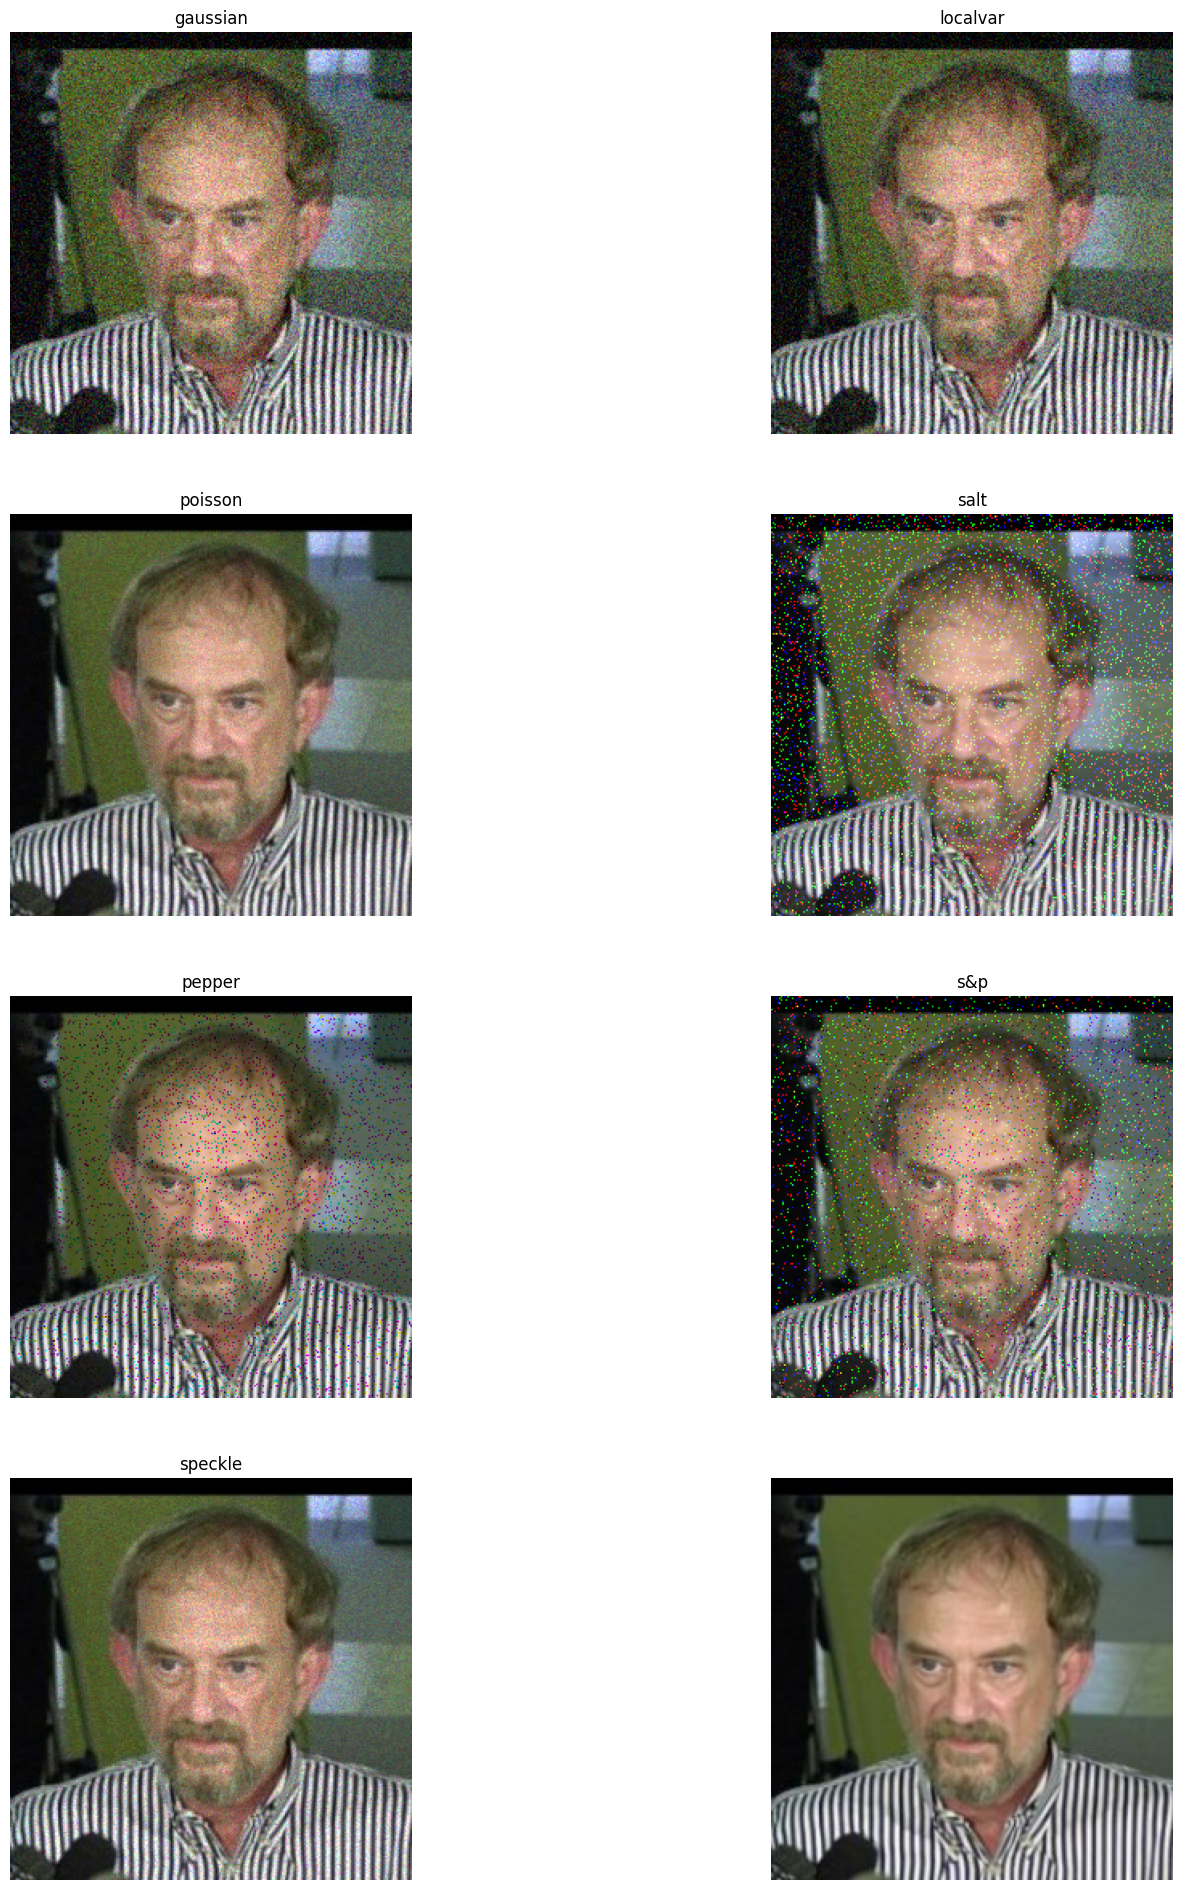

In [ ]:
img_path="/content/gdrive/MyDrive/kaggle/Alan_Stonecipher_0001.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()



filter implementation

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/kaggle/Aaron_Peirsol_0001.jpg')  # Read image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



output_gaus = cv2.GaussianBlur(img,(5,5),0)
output_medd = cv2.medianBlur(img,5)
saltpim = add_noise(img)
# gausnn = add_gaussian_noise(img)

gauss_save = '/content/newz/gauss1.jpg'
medd_save = '/content/newz/medd1.jpg'
orig_save = '/content/newz/orig1.jpg'
noise_img = '/content/newz/noisesp1.jpg'
# noise_gauss = '/content/newz/noisegauss1.jpg'


cv2.imwrite(gauss_save,output_gaus)
cv2.imwrite(medd_save,output_medd)
cv2.imwrite(orig_save,img)
cv2.imwrite(noise_img,saltpim)
# cv2.imwrite(noise_gauss,gausnn)


# cv2.imshow('gaussian',output_gaus)
# cv2.imshow('median',output_medd)

True

# Gaussain Noise

In [ ]:
def add_gaussian_noise(img_list, mean=0, std=1):
    noisy_images = []
    for image_path in img_list:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gaussian_noise = np.copy(image)
        noise = np.random.normal(mean, std, image.shape)
        gaussian_noise = cv2.add(gaussian_noise.astype(np.float64), noise.astype(np.float64))
        gaussian_noise = np.clip(gaussian_noise, 0, 255).astype(np.uint8)

        noisy_images.append(gaussian_noise)

    return noisy_images

def save_images(images, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, image in enumerate(images):
        output_path = os.path.join(output_dir, f"gaussain_{i}.jpg")
        cv2.imwrite(output_path, image)
        # print(f"Saved gaussain noise image {i} to: {output_path}")


noisy_images = add_gaussian_noise(img_list, mean=0, std=30)
output_dir = "/content/gaussian_noise"
save_images(noisy_images, output_dir)

# Salt & Pepper Noise

In [ ]:
def add_salt_pepper_noise(input_folder, output_folder, prob=0.05, salt_vs_pepper=0.5):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get a list of image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    # Process each image
    for image_file in image_files:
        # Load the image
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path)

        # Add salt and pepper noise to the image
        noisy_image = np.copy(image)
        height, width, _ = noisy_image.shape
        num_salt = int(prob * width * height * salt_vs_pepper)
        num_pepper = int(prob * width * height * (1 - salt_vs_pepper))
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in noisy_image.shape[:2]]
        noisy_image[coords] = (255, 255, 255)
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in noisy_image.shape[:2]]
        noisy_image[coords] = (0, 0, 0)

        # Save the noisy image
        output_path = os.path.join(output_folder, f"noisy_{image_file}")
        cv2.imwrite(output_path, noisy_image)

        # print(f"Noisy image saved: {output_path}")

In [ ]:
input_folder = '/content/gdrive/MyDrive/kaggle'
output_folder = '/content/median_noise'
add_salt_pepper_noise(input_folder, output_folder, prob=0.05, salt_vs_pepper=0.5)

<ipython-input-19-f6fee9709c28>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noisy_image[coords] = (255, 255, 255)
<ipython-input-19-f6fee9709c28>:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noisy_image[coords] = (0, 0, 0)


# Median Filter

In [ ]:
def median_filtering(images_folder, output_folder):
    for filename in os.listdir(images_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(images_folder, filename)
            img = cv2.imread(image_path, 0)  # Read image in grayscale

            # Apply median filtering to reduce salt and pepper noise
            filtered_img = cv2.medianBlur(img, 5)

            # Save the filtered image in the output folder
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, filtered_img)

            print(f"Processed: {filename}")

    print("Processing completed.")


input_folder = "/content/median_noise"
output_folder = "/content/median_filter"

median_filtering(input_folder, output_folder)

Processed: noisy_Al_Sharpton_0006.jpg
Processed: noisy_Al_Gore_0004.jpg
Processed: noisy_Adelina_Avila_0001.jpg
Processed: noisy_Adrien_Brody_0008.jpg
Processed: noisy_Abdullah_al-Attiyah_0003.jpg
Processed: noisy_Abdullah_al-Attiyah_0002.jpg
Processed: noisy_Aaron_Tippin_0001.jpg
Processed: noisy_Allison_Janney_0002.jpg
Processed: noisy_Alexander_Losyukov_0002.jpg
Processed: noisy_Alejandro_Toledo_0032.jpg
Processed: noisy_Aaron_Peirsol_0002.jpg
Processed: noisy_Alejandro_Toledo_0030.jpg
Processed: noisy_Alfonso_Portillo_0001.jpg
Processed: noisy_Abdullah_Gul_0012.jpg
Processed: noisy_Alexander_Downer_0004.jpg
Processed: noisy_Alicia_Silverstone_0002.jpg
Processed: noisy_Ali_Naimi_0001.jpg
Processed: noisy_Alejandro_Toledo_0003.jpg
Processed: noisy_AJ_Lamas_0001.jpg
Processed: noisy_Aicha_El_Ouafi_0002.jpg
Processed: noisy_Albert_Costa_0006.jpg
Processed: noisy_Adam_Ant_0001.jpg
Processed: noisy_Adam_Kennedy_0001.jpg
Processed: noisy_Alejandro_Toledo_0038.jpg
Processed: noisy_Ahmed_Ch

# Gaussain Filter

In [ ]:
def gaussain_filter(images_folder, output_folder):

    for filename in os.listdir(images_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(images_folder, filename)
            img = cv2.imread(image_path, 0)  # Read image in grayscale
            sigma = 1
            # Apply median filtering to reduce salt and pepper noise
            filtered_image = cv2.GaussianBlur(img, (0, 0), sigmaX=sigma, sigmaY=sigma)

            # Save the filtered image in the output folder
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, filtered_image)

            # print(f"Processed: {filename}")

    print("Processing completed.")

In [ ]:

images_folder='/content/gaussian_noise'
output_folder='/content/gaussain_filter'
gaussain_filter(images_folder, output_folder)

Processing completed.


#Combination Filter (gaussain and median)

In [ ]:
!mkdir combination_filter
images_folder='/content/median_filter'
output_folder='/content/combination_filter'
gaussain_filter(images_folder, output_folder)

Processing completed.


# Bilateral Filter

In [ ]:
def bilateral_filter_images(input_folder, output_folder, diameter, sigma_color, sigma_space):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get list of image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    for image_file in image_files:
        # Load image
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path)

        # Apply bilateral filter
        filtered_image = cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)

        # Save filtered image
        output_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_path, filtered_image)

        #print(f"Filtered image saved: {output_path}")

# Example usage
input_folder = '/content/gdrive/MyDrive/kaggle'
output_folder = '/content/bilateral_filter'
diameter = 15
sigma_color = 75
sigma_space = 75

bilateral_filter_images(input_folder, output_folder, diameter, sigma_color, sigma_space)


#Wiener Filter

In [ ]:
import os
import cv2
import numpy as np

def wiener_filter_images(input_folder, output_folder, kernel_size, noise_variance):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get list of image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    for image_file in image_files:
        # Load image
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Apply Wiener filter
        filtered_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        filtered_image[:, :, 0] = cv2.dct(cv2.idct(filtered_image[:, :, 0] / 255) / np.max(filtered_image[:, :, 0]) * 255) * 255
        filtered_image[:, :, 1] = cv2.dct(cv2.idct(filtered_image[:, :, 1] / 255) / np.max(filtered_image[:, :, 1]) * 255) * 255
        filtered_image[:, :, 2] = cv2.dct(cv2.idct(filtered_image[:, :, 2] / 255) / np.max(filtered_image[:, :, 2]) * 255) * 255
        filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)

        # Save filtered image
        output_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_path, filtered_image)

        # print(f"Filtered image saved: {output_path}")

# Example usage
input_folder = "/content/gdrive/MyDrive/kaggle"
output_folder = "/content/wiener_filter"
kernel_size = 5
noise_variance = 0.01

wiener_filter_images(input_folder, output_folder, kernel_size, noise_variance)


# Mean Filter

In [ ]:
def mean_filter_images(input_folder, output_folder, kernel_size):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get list of image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    for image_file in image_files:
        # Load image
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path)

        # Apply mean filter
        filtered_image = cv2.blur(image, (kernel_size, kernel_size))


        # Save filtered image
        output_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_path, filtered_image)

        # print(f"Filtered image saved: {output_path}")

# Example usage
input_folder = "/content/gdrive/MyDrive/kaggle"
output_folder = "/content/mean_filter"
kernel_size = 5

mean_filter_images(input_folder, output_folder, kernel_size)

In [ ]:
def combination_of_all(input_folder, output_folder, kernel_size):

    image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    for image_file in image_files:
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path)

        filtered_image = cv2.blur(image, (kernel_size, kernel_size))
        filtered_image = cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)
        filtered_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        filtered_image[:, :, 0] = cv2.dct(cv2.idct(filtered_image[:, :, 0] / 255) / np.max(filtered_image[:, :, 0]) * 255) * 255
        filtered_image[:, :, 1] = cv2.dct(cv2.idct(filtered_image[:, :, 1] / 255) / np.max(filtered_image[:, :, 1]) * 255) * 255
        filtered_image[:, :, 2] = cv2.dct(cv2.idct(filtered_image[:, :, 2] / 255) / np.max(filtered_image[:, :, 2]) * 255) * 255
        filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)


        output_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_path, filtered_image)
        # print(f"Filtered image saved: {output_path}")

input_folder = "/content/combination_filter"
output_folder = "/content/combination_of_all"
kernel_size = 5

mean_filter_images(input_folder, output_folder, kernel_size)

In [ ]:
for filename in glob.glob("/content/quantum_edge/*.jpeg"):
  img = cv2.imread(filename)  # Read image
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Setting parameter values
  t_lower = 50  # Lower Threshold
  t_upper = 150  # Upper threshold

  #performing edge detection
  gradients_sobelx = cv2.Sobel(img, -1, 1, 0)
  gradients_sobely = cv2.Sobel(img, -1, 0, 1)
  gradients_sobelxy = cv2.addWeighted(gradients_sobelx, 0.5, gradients_sobely, 0.5, 0)

  gradients_laplacian = cv2.Laplacian(img, -1)

  # Saving all the filter images
  sobelx_save = '/content/quantum_out/sobelx.jpg'
  sobely_save = '/content/quantum_out/sobely.jpg'
  sobelxy_save = '/content/quantum_out/sobelxy.jpg'
  lap_save = '/content/quantum_out/lap.jpg'
  canny_save = '/content/quantum_out/canny.jpg'

  # Applying the Canny Edge filter
  edge = cv2.Canny(img, t_lower, t_upper)


  cv2.imwrite(sobelx_save, gradients_sobelx)
  cv2.imwrite(sobely_save, gradients_sobely)
  cv2.imwrite(sobelxy_save, gradients_sobelxy)
  cv2.imwrite(lap_save, gradients_laplacian)
  cv2.imwrite(canny_save, edge)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [ ]:
!ls /content/noise_combined

# Machine Learning(Using YoloV5)

In [ ]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5m')

# Image
im = '/content/gdrive/MyDrive/kaggle/Aaron_Sorkin_0002.jpg'

# Inference
results = model(im)

results.pandas().xyxy[0]



/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-6-5 Python-3.10.11 torch-2.0.1+cu118 CPU

100%|██████████| 40.8M/40.8M [00:00<00:00, 119MB/s]

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,147.747070,218.436813,176.503235,250.000000,0.811195,27,tie
1,9.161162,18.267393,234.997849,248.504913,0.616849,0,person


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5l')

image1 ='/content/newz/canny.jpg'
image2 ='/content/newz/lap.jpg'
image3 = '/content/newz/sobelx.jpg'
image4 = '/content/newz/sobelxy.jpg'
image5 = '/content/newz/sobelxy.jpg'

# Images
# for f in image1, image2:
#     torch.hub.download_url_to_file('https://ultralytics.com/images/' + f, f)  # download 2 images
im1 = Image.open(image1)  # PIL image
im2 = cv2.imread(image2)[..., ::-1]  # OpenCV image (BGR to RGB)
im3 = cv2.imread(image3)[..., ::-1]
im4 = cv2.imread(image4)[..., ::-1]
im5 = cv2.imread(image5)[..., ::-1]

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-30 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 89.3M/89.3M [00:04<00:00, 22.3MB/s]

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


FileNotFoundError: ignored

In [ ]:

# Inference
results = model([im1, im2,im3,im4,im5], size=640) # batch of images

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]

# Psnr (Peak Signal-To-Noise Ratio)

In [ ]:
orig = cv2.imread('/content/newz/orig1.jpg')

In [ ]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return '100%'
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))



In [ ]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
d = psnr(img, im1)
e = psnr(orig, im2)
f = psnr(orig, im3)
g = psnr(orig, im4)
h = psnr(orig, im5)

In [ ]:
print(f"PSNR value is for canny is {d} dB")
print(f"PSNR value is for laplacian is {e} dB")
print(f"PSNR value is for sobelx is {f} dB")
print(f"PSNR value is for sobely is {g} dB")
print(f"PSNR value is for sobelxy is {h} dB")

In [ ]:
max(d, e, f, g, h)

In [ ]:
if(d>e and d>f and  d>f and d>g):
  print(f'canny {d} is largest')
elif(e>f and e>g and e>h):
   print(f"laplacian {e} is largest")

elif(f>g and f>h):
   print(f"sobelX {f} is largest")

elif(d>h):
   print(f"sobelY {g} is largest")

else:
  print(f"sobelXY {h} is largest")

In [ ]:
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('0')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def calculate_psnr_for_folder(folder1, folder2):
    images1 = os.listdir(folder1)
    images2 = os.listdir(folder2)

    assert len(images1) == len(images2), "The number of images in the folders should be the same."

    psnr_values = []

    for image1, image2 in zip(images1, images2):
        img_path1 = os.path.join(folder1, image1)
        img_path2 = os.path.join(folder2, image2)

        img1 = cv2.imread(img_path1)
        img2 = cv2.imread(img_path2)

        assert img1.shape == img2.shape, f"The shapes of {img_path1} and {img_path2} do not match."

        psnr = calculate_psnr(img1, img2)
        psnr_values.append(psnr)

    return psnr_values

# Provide the paths to the folders containing the images
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/combination_filter"

psnr_combination = calculate_psnr_for_folder(folder1, folder2)

# print("PSNR values:")
# for i, psnr in enumerate(psnr_combination):
#     print(f"Image {i+1}: {psnr} dB")

In [ ]:
folder1 = '/content/gdrive/MyDrive/kaggle'
folder2 ='/content/gaussain_filter'
psnr_gaussain = calculate_psnr_for_folder(folder1, folder2)


In [ ]:
psnr_gaussain

[28.07789749501373,
 27.86557947713895,
 27.92296548431553,
 27.868113541504144,
 28.03001362506277,
 28.23437455612227,
 27.853084463644734,
 27.875565617773056,
 27.858670953845674,
 28.013033318892315,
 27.725517542361523,
 27.752565231879633,
 27.748837279192795,
 27.757553854831826,
 27.93298169816447,
 27.742276202875434,
 27.822194985401527,
 27.936852583757975,
 27.997806298085443,
 27.762567153295752,
 27.912171848363766,
 27.67165934216934,
 28.005921286608935,
 28.166688915425105,
 28.06729369836159,
 27.879815859872757,
 27.90104115267941,
 27.884571199605375,
 27.91758130126949,
 27.89746675865691,
 27.991161199836636,
 27.84234304621102,
 27.9519321439897,
 27.808899283028502,
 28.017026565369186,
 28.005476594408336,
 27.811016149889234,
 27.879665672475163,
 27.861592399294743,
 27.889483588614034,
 28.00516988234476,
 27.829187430477823,
 27.916954169151154,
 27.596069838321373,
 27.892048743550305,
 27.87493513314939,
 28.21133895055262,
 27.769929466243696,
 28.01581

In [ ]:
folder1 = '/content/gdrive/MyDrive/kaggle'
folder2 ='/content/median_filter'
psnr_median = calculate_psnr_for_folder(folder1, folder2)

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/bilateral_filter"

psnr_bilateral = calculate_psnr_for_folder(folder1, folder2)

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/wiener_filter"

psnr_weiner = calculate_psnr_for_folder(folder1, folder2)

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/mean_filter"

psnr_mean = calculate_psnr_for_folder(folder1, folder2)

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/combination_of_all"

psnr_combination_of_all = calculate_psnr_for_folder(folder1, folder2)

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/gdrive/MyDrive/kaggle"

psnr_actual = calculate_psnr_for_folder(folder1, folder2)

# SSIM & MSE


In [ ]:
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skimage.color import rgb2gray

def calculate_ssim(image1, image2):
    # Convert the images to grayscale if they are in color
    if image1.shape[-1] == 3:
        image1 = rgb2gray(image1)
    if image2.shape[-1] == 3:
        image2 = rgb2gray(image2)

    # Calculate SSIM
    ssim_score, _ = ssim(image1, image2, full=True)

    return ssim_score

In [ ]:
calculate_ssim(orig, im2)

NameError: ignored

In [ ]:
# # Load the two images
# image1 = imread('image1.png', as_gray=True)
# image2 = imread('image2.png', as_gray=True)

# Calculate the MSE
mse = mean_squared_error(orig, im2)

print("Mean Squared Error:", mse)

In [ ]:
def calculate_ssim(img1, img2):
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    score, _ = ssim(img1, img2, full=True)
    return score

def calculate_ssim_for_folder(folder1, folder2):
    images1 = os.listdir(folder1)
    images2 = os.listdir(folder2)

    assert len(images1) == len(images2), "The number of images in the folders should be the same."

    ssim_values = []

    for image1, image2 in zip(images1, images2):
        img_path1 = os.path.join(folder1, image1)
        img_path2 = os.path.join(folder2, image2)

        img1 = cv2.imread(img_path1)
        img2 = cv2.imread(img_path2)

        assert img1.shape == img2.shape, f"The shapes of {img_path1} and {img_path2} do not match."

        ssim_value = calculate_ssim(img1, img2)
        ssim_values.append(ssim_value)

    return ssim_values

# Provide the paths to the folders containing the images
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/combination_filter"


ssim_combination = calculate_ssim_for_folder(folder1, folder2)



In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/gaussain_filter"


ssim_gaussian = calculate_ssim_for_folder(folder1, folder2)

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/median_filter"


ssim_median = calculate_ssim_for_folder(folder1, folder2)

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/bilateral_filter"


ssim_bilateral = calculate_ssim_for_folder(folder1, folder2)

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/wiener_filter"


ssim_wiener = calculate_ssim_for_folder(folder1, folder2)

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/mean_filter"


ssim_mean = calculate_ssim_for_folder(folder1, folder2)

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/combination_of_all"


ssim_combination_of_all = calculate_ssim_for_folder(folder1, folder2)

In [ ]:
def calculate_mse(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    return mse

def calculate_mse_for_folder(folder1, folder2):
    images1 = os.listdir(folder1)
    images2 = os.listdir(folder2)

    assert len(images1) == len(images2), "The number of images in the folders should be the same."

    mse_values = []

    for image1, image2 in zip(images1, images2):
        img_path1 = os.path.join(folder1, image1)
        img_path2 = os.path.join(folder2, image2)

        img1 = cv2.imread(img_path1)
        img2 = cv2.imread(img_path2)

        assert img1.shape == img2.shape, f"The shapes of {img_path1} and {img_path2} do not match."

        mse = calculate_mse(img1, img2)
        mse_values.append(mse)

    return mse_values

# Provide the paths to the folders containing the images
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/combination_filter"

mse_values = calculate_mse_for_folder(folder1, folder2)

print("MSE values:")
for i, mse in enumerate(mse_values):
    print(f"Image {i+1}: {mse}")

MSE values:
Image 1: 100.37548266666667
Image 2: 102.911648
Image 3: 103.94919466666667
Image 4: 105.890336
Image 5: 104.56613333333334
Image 6: 102.81630933333334
Image 7: 100.77016533333334
Image 8: 102.544368
Image 9: 102.35772266666666
Image 10: 102.18448
Image 11: 109.62464
Image 12: 101.67783466666667
Image 13: 105.76188266666666
Image 14: 91.693904
Image 15: 101.68531733333333
Image 16: 102.96322666666667
Image 17: 106.65554666666667
Image 18: 105.09402666666666
Image 19: 104.831536
Image 20: 99.872688
Image 21: 106.386608
Image 22: 97.40421866666667
Image 23: 103.024608
Image 24: 106.03249066666666
Image 25: 106.79116266666666
Image 26: 105.56740266666667
Image 27: 103.752336
Image 28: 107.83468266666667
Image 29: 103.68985066666667
Image 30: 107.528368
Image 31: 104.87840533333333
Image 32: 96.18672533333333
Image 33: 102.85376
Image 34: 104.874384
Image 35: 101.966672
Image 36: 103.667328
Image 37: 106.39292266666666
Image 38: 103.31061333333334
Image 39: 105.567792
Image 40:

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/gaussain_filter"

mse_values1 = calculate_mse_for_folder(folder1, folder2)

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/median_filter"

mse_values2 = calculate_mse_for_folder(folder1, folder2)

In [ ]:
folder1 = "/content/gdrive/MyDrive/kaggle"
folder2 = "/content/gdrive/MyDrive/kaggle"

mse_acutal = calculate_mse_for_folder(folder1, folder2)

In [ ]:
filename = 'output_ssim.csv'

# Open the file in write mode
with open(filename, mode='w', newline='') as file:
    # Create the CSV writer object
    writer = csv.writer(file)

    # Write the headers
    writer.writerow(['SSIM combination','SSIM gaussain','SSIM median','SSIM wiener','PSNR combination'])

    # Write the data from the lists
    for i in range(len(mse_values)):
        writer.writerow([ssim_combination[i],ssim_gaussian[i],ssim_median[i] ,ssim_wiener[i],psnr_combination[i]])

In [ ]:
filename = 'output_psnr.csv'

# Open the file in write mode
with open(filename, mode='w', newline='') as file:
    # Create the CSV writer object
    writer = csv.writer(file)

    # Write the headers
    writer.writerow(['PSNR combination','PSNR gaussain','PSNR median','PSNR wiener'])

    # Write the data from the lists
    for i in range(len(psnr_combination)):
        writer.writerow([psnr_combination[i],psnr_gaussain[i],psnr_median[i] ,psnr_weiner[i]])

# Decision Tree Model

In [ ]:
from sklearn.cluster import KMeans
data = pd.read_csv('/content/output_psnr.csv')
X = data[['PSNR combination', 'PSNR gaussain', 'PSNR median','PSNR wiener']].values
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)
labels = kmeans.labels_
data['cluster'] = labels
print(data['cluster'])

0      2
1      2
2      2
3      0
4      0
      ..
397    2
398    0
399    2
400    0
401    2
Name: cluster, Length: 402, dtype: int32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


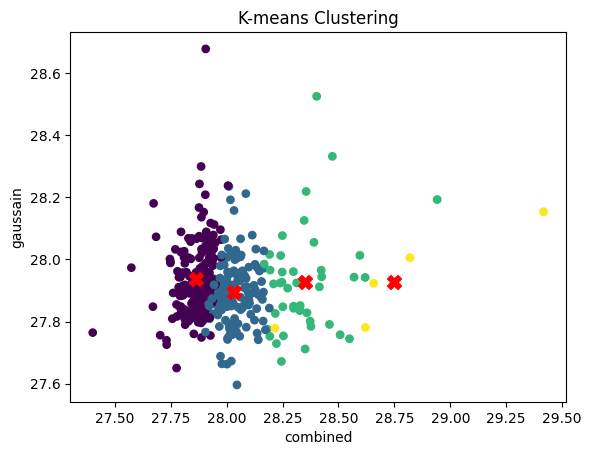

In [ ]:
if data.isnull().values.any():
    data = data.dropna()
k = 4 # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(data['PSNR combination'], data['PSNR gaussain'],data['PSNR median'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100)
plt.xlabel('combined')
plt.ylabel('gaussain')
plt.title('K-means Clustering')
plt.show()

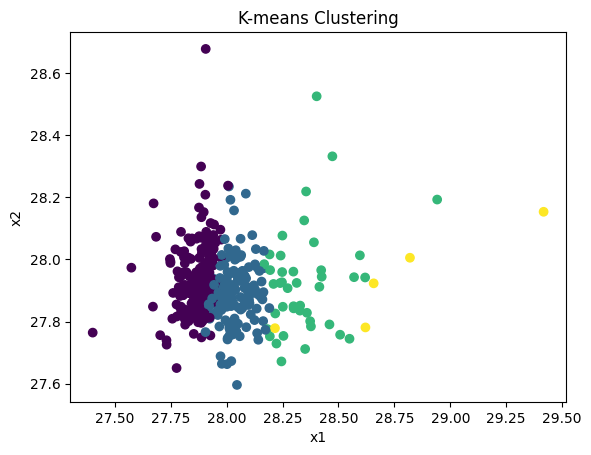

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-means Clustering')
plt.show()

In [ ]:
data

,PSNR combination,PSNR gaussain,PSNR median,PSNR wiener,cluster
0,28.114527,28.077897,28.122696,28.043915,2
1,28.006158,27.865579,28.025103,28.178888,2
2,27.962592,27.922965,27.957818,27.881737,2
3,27.882240,27.868114,27.864613,27.752736,0
4,27.936893,28.030014,27.930857,28.031418,0
...,...,...,...,...,...
397,27.986036,27.909798,27.971130,27.991667,2
398,27.812681,27.838534,27.824892,27.829192,0
399,27.963227,27.893204,27.960305,27.951889,2
400,27.848346,27.844305,27.858303,27.790431,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


data = pd.read_csv('/content/output.csv')

# Step 3: Preprocess the data
# Assuming the three variables of interest are 'X1', 'X2', and 'X3'
X = data[['PSNR combination', 'PSNR gaussian', 'PSNR median']]
y = data['PSNR combination']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions using the trained model
y_pred = model.predict(X_test)

# Step 7: Visualize the results with graphs
# Create a scatter plot of the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Create a histogram of the residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Calculate and print the root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

FileNotFoundError: ignored

In [ ]:
model = LinearRegression()
model.fit(X, y)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
predictions = model.predict(X)


NameError: ignored

In [ ]:
data = pd.read_csv('/content/output_ssim.csv')

# Separate the variables and the target variable
X1 = data['SSIM combination']
X2 = data['SSIM gaussain']
X3 = data['SSIM median']
Y = data['SSIM combination']

# Create the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X1, Y)
pred1 = model.predict(X1)

model.fit(X2, Y)
pred2 = model.predict(X2)

model.fit(X3, Y)
pred3 = model.predict(X3)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(X1, Y, color='blue')
plt.plot(X1, pred1, color='red', linewidth=2)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression: X1 vs Y')

plt.subplot(1, 3, 2)
plt.scatter(X2, Y, color='blue')
plt.plot(X2, pred2, color='red', linewidth=2)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression: X2 vs Y')

plt.subplot(1, 3, 3)
plt.scatter(X3, Y, color='blue')
plt.plot(X3, pred3, color='red', linewidth=2)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression: X3 vs Y')

plt.tight_layout()
plt.show()

ValueError: ignored

In [ ]:
# Load data from CSV file
data = pd.read_csv('output.csv')

# Separate the features (independent variables) and the target variable
X = data[['PSNR gaussain', 'PSNR median', 'PSNR bilateral', 'PSNR wiener']]
y = data['PSNR combination']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients and the intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and the intercept
print('Coefficients:', coefficients)
print('Intercept:', intercept)

# Plot the actual values and the predicted values
plt.scatter(data.index, y, color='blue', label='Actual')
plt.plot(data.index, model.predict(X), color='red', linewidth=2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()

FileNotFoundError: ignored

In [ ]:
def compare_highest(*lists):
    highest_values = []
    for lst in lists:
        highest_value = max(lst)
        highest_values.append(highest_value)
    max_value = max(highest_values)
    return max_value

In [ ]:
max_value = compare_highest(psnr_combination,psnr_gaussain,psnr_median,psnr_bilateral,psnr_weiner,psnr_mean, psnr_combination_of_all)
print("The highest value among the lists is:", max_value)

The highest value among the lists is: 29.96235102235282


In [ ]:
d = psnr_combination
e = psnr_gaussain
f = psnr_median
g = psnr_bilateral
h = psnr_weiner

In [ ]:
for i in range(len(mse_values)):
  if(d[i]>e and d[i]>f[i] and  d[i]>f[i] and d[i]>g[i]):
    print(f'canny {d} is largest')
  elif(e[i]>f[i] and e[i]>g[i] and e[i]>h[i]):
    print(f"laplacian {e} is largest")

  elif(f[i]>g[i] and f[i]>h[i]):
    print(f"sobelX {f} is largest")

  elif(d[i]>h[i]):
    print(f"sobelY {g} is largest")

  else:
    print(f"sobelXY {h} is largest")

NameError: ignored

In [ ]:
df

,PSNR combination,PSNR gaussain,PSNR median,PSNR bilateral,PSNR wiener,PSNR mean,Combination of All,PSNR actual
0,28.021688,27.905354,28.020113,27.975475,28.083260,27.962713,28.028277,0.0
1,28.332511,27.739342,28.319067,27.997015,28.056584,28.021274,28.334736,0.0
2,27.938107,27.910699,27.944737,27.912338,27.934198,27.892359,27.932553,0.0
3,27.828941,28.064191,27.816790,27.818374,27.850319,27.844525,27.816944,0.0
4,28.024996,27.908808,28.025286,27.892384,27.922461,27.884914,28.032285,0.0
...,...,...,...,...,...,...,...,...
397,27.949041,27.938374,27.962081,28.022199,27.889693,28.003056,27.940877,0.0
398,27.796849,27.914480,27.789379,27.810230,27.838667,27.828656,27.784284,0.0
399,27.806970,27.867841,27.805366,27.934990,27.988752,27.914315,27.801557,0.0
400,27.855040,27.818248,27.864518,27.991136,27.979703,27.987472,27.840551,0.0


In [ ]:
df = pd.read_csv('output_psnr.csv')
filter_columns = ['PSNR combination', 'PSNR gaussain', 'PSNR median', 'PSNR wiener']
best_filters_psnr = []
vfor _, row in df.iterrows():
    # Get the PSNR values for the filters in the current row
    psnr_values = row[filter_columns]

    # Find the index of the filter with the maximum PSNR value
    best_filter_index = np.argmax(psnr_values)

    # Get the name of the filter associated with the maximum PSNR value
    best_filter = filter_columns[best_filter_index]

    # Append the best filter to the list
    best_filters_psnr.append(best_filter)

# Print the best filters for each image
for i, best_filter in enumerate(best_filters_psnr):
    print(f"Image {i+1}: Best Filter = {best_filter}")

Image 1: Best Filter = PSNR median
Image 2: Best Filter = PSNR wiener
Image 3: Best Filter = PSNR combination
Image 4: Best Filter = PSNR combination
Image 5: Best Filter = PSNR wiener
Image 6: Best Filter = PSNR gaussain
Image 7: Best Filter = PSNR wiener
Image 8: Best Filter = PSNR combination
Image 9: Best Filter = PSNR median
Image 10: Best Filter = PSNR median
Image 11: Best Filter = PSNR wiener
Image 12: Best Filter = PSNR median
Image 13: Best Filter = PSNR wiener
Image 14: Best Filter = PSNR median
Image 15: Best Filter = PSNR median
Image 16: Best Filter = PSNR wiener
Image 17: Best Filter = PSNR wiener
Image 18: Best Filter = PSNR gaussain
Image 19: Best Filter = PSNR wiener
Image 20: Best Filter = PSNR median
Image 21: Best Filter = PSNR gaussain
Image 22: Best Filter = PSNR median
Image 23: Best Filter = PSNR median
Image 24: Best Filter = PSNR gaussain
Image 25: Best Filter = PSNR wiener
Image 26: Best Filter = PSNR wiener
Image 27: Best Filter = PSNR combination
Image 28:

In [ ]:
filename = 'model_input.csv'

# Open the file in write mode
with open(filename, mode='w', newline='') as file:
    # Create the CSV writer object
    writer = csv.writer(file)

    # Write the headers
    writer.writerow(['PSNR','filter index PSNR','SSIM','filter index SSIM',])

    # Write the data from the lists
    for i in range(len(best_filters_psnr)):
        writer.writerow([best_filters_psnr[i],numbered_list_psnr[i],best_filters_ssim[i],numbered_list_ssim[i]])



In [ ]:
type(best_filters_psnr)

list

In [ ]:
def assign_numbers(items):
    number_mapping = {}  # Dictionary to store the mapping of items to numbers
    assigned_numbers = []  # List to store the assigned numbers

    current_number = 1  # Starting number

    for item in items:
        if item not in number_mapping:
            # Assign a new number to the item
            number_mapping[item] = current_number
            current_number += 1

        # Append the assigned number to the list
        assigned_numbers.append(number_mapping[item])

    return assigned_numbers

In [ ]:
items = ['PSNR combination', 'PSNR gaussain', 'PSNR median','PSNR wiener']
# items = best_filters_psnr
assigned_numbers_psnr= assign_numbers(best_filters_psnr)


In [ ]:
df = pd.read_csv('output_ssim.csv')
filter_columns = ['SSIM combination', 'SSIM gaussain', 'SSIM median', 'SSIM wiener']
best_filters_ssim = []
for _, row in df.iterrows():
    # Get the PSNR values for the filters in the current row
    psnr_values = row[filter_columns]

    # Find the index of the filter with the maximum PSNR value
    best_filter_index = np.argmax(psnr_values)

    # Get the name of the filter associated with the maximum PSNR value
    best_filter = filter_columns[best_filter_index]

    # Append the best filter to the list
    best_filters_ssim.append(best_filter)

# Print the best filters for each image
for i, best_filter in enumerate(best_filters_ssim):
    print(f"Image {i+1}: Best Filter = {best_filter}")

Image 1: Best Filter = SSIM combination
Image 2: Best Filter = SSIM median
Image 3: Best Filter = SSIM combination
Image 4: Best Filter = SSIM combination
Image 5: Best Filter = SSIM combination
Image 6: Best Filter = SSIM gaussain
Image 7: Best Filter = SSIM combination
Image 8: Best Filter = SSIM combination
Image 9: Best Filter = SSIM combination
Image 10: Best Filter = SSIM combination
Image 11: Best Filter = SSIM combination
Image 12: Best Filter = SSIM combination
Image 13: Best Filter = SSIM combination
Image 14: Best Filter = SSIM combination
Image 15: Best Filter = SSIM wiener
Image 16: Best Filter = SSIM combination
Image 17: Best Filter = SSIM combination
Image 18: Best Filter = SSIM combination
Image 19: Best Filter = SSIM wiener
Image 20: Best Filter = SSIM combination
Image 21: Best Filter = SSIM combination
Image 22: Best Filter = SSIM median
Image 23: Best Filter = SSIM combination
Image 24: Best Filter = SSIM combination
Image 25: Best Filter = SSIM wiener
Image 26: Be

In [ ]:
items = best_filters_psnr
assigned_numbers_ssim= assign_numbers()

NameError: ignored

In [ ]:
data_list = best_filters_psnr
mapping_list = ['PSNR combination', 'PSNR gaussain', 'PSNR median', 'PSNR bilateral', 'PSNR wiener', 'PSNR mean', 'Combination of All']

# Create a dictionary to map values to numbers
mapping_dict = {value: index + 1 for index, value in enumerate(mapping_list)}

# Assign numbers to data in the list
numbered_list_psnr = [mapping_dict[value] for value in data_list]

print(numbered_list_psnr)

[3, 5, 1, 1, 5, 2, 5, 1, 3, 3, 5, 3, 5, 3, 3, 5, 5, 2, 5, 3, 2, 3, 3, 2, 5, 5, 1, 5, 3, 5, 2, 5, 3, 5, 3, 2, 3, 3, 3, 5, 5, 3, 2, 5, 5, 5, 2, 5, 3, 5, 5, 2, 5, 1, 2, 1, 2, 3, 5, 2, 5, 1, 5, 1, 5, 5, 1, 5, 5, 3, 2, 5, 3, 5, 5, 2, 5, 3, 3, 2, 5, 2, 1, 5, 3, 3, 2, 1, 2, 5, 1, 5, 2, 3, 5, 2, 5, 5, 5, 5, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 5, 3, 5, 2, 5, 2, 5, 1, 5, 1, 5, 3, 2, 3, 5, 5, 5, 5, 3, 2, 1, 5, 5, 5, 3, 1, 1, 3, 5, 5, 5, 3, 1, 5, 5, 5, 2, 5, 1, 5, 1, 5, 3, 2, 5, 3, 2, 2, 3, 5, 2, 3, 5, 3, 5, 5, 1, 5, 3, 2, 5, 5, 5, 3, 1, 3, 2, 3, 5, 5, 5, 3, 3, 2, 1, 3, 3, 1, 2, 5, 5, 3, 1, 5, 1, 3, 2, 3, 3, 3, 2, 2, 3, 3, 5, 2, 2, 3, 1, 2, 1, 5, 1, 2, 1, 2, 1, 5, 1, 3, 5, 1, 3, 5, 5, 5, 2, 3, 5, 2, 5, 3, 3, 5, 3, 2, 3, 5, 3, 5, 3, 2, 1, 1, 3, 5, 5, 5, 2, 2, 1, 3, 3, 1, 5, 5, 2, 3, 5, 5, 2, 2, 2, 2, 1, 5, 2, 2, 1, 2, 1, 3, 5, 3, 3, 5, 2, 5, 5, 2, 1, 2, 2, 5, 5, 5, 3, 5, 1, 3, 1, 2, 5, 3, 3, 3, 5, 5, 1, 5, 2, 5, 3, 5, 2, 3, 3, 5, 3, 1, 3, 5, 5, 2, 5, 2, 3, 3, 2, 5, 5, 3, 5, 5, 2, 5, 3, 3, 5, 2, 1, 2, 1, 

In [ ]:
data_list = best_filters_ssim
mapping_list = ['SSIM combination', 'SSIM gaussain', 'SSIM median', 'SSIM bilateral', 'SSIM wiener', 'SSIM mean', 'SSIM Combination of All']

# Create a dictionary to map values to numbers
mapping_dict = {value: index + 1 for index, value in enumerate(mapping_list)}

# Assign numbers to data in the list
numbered_list_ssim= [mapping_dict[value] for value in data_list]

print(numbered_list_ssim)

[1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1, 5, 1, 5, 1, 1, 5, 5, 1, 5, 1, 1, 5, 2, 1, 1, 1, 5, 1, 1, 5, 1, 5, 1, 1, 1, 5, 2, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 1, 5, 1, 2, 1, 1, 1, 1, 2, 1, 5, 1, 5, 1, 2, 5, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 2, 5, 2, 1, 5, 1, 1, 5, 2, 3, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 5, 1, 1, 1, 1, 5, 1, 5, 1, 5, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 1, 5, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 3, 1, 5, 1, 1, 1, 1, 5, 5, 1, 5, 1, 5, 1, 5, 1, 1, 1, 5, 5, 1, 2, 1, 5, 1, 5, 1, 2, 1, 1, 5, 5, 1, 1, 5, 5, 5, 1, 5, 2, 1, 5, 1, 1, 5, 1, 5, 5, 5, 1, 2, 1, 1, 1, 5, 1, 1, 5, 5, 5, 5, 1, 5, 2, 5, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 5, 5, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 5, 3, 5, 5, 5, 2, 1, 

In [ ]:
acuracy=68.920191301

In [ ]:

# Read the data from the CSV file
data = pd.read_csv('model_input.csv')

# Extract the input feature (X) and the target variable (y)
X = data['PSNR filter id'].values.reshape(-1, 1)
y = data['SSIM filter id'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target variable using the trained model
y_pred = model.predict(X)

# Plot the original data points and the regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('PSNR')
plt.ylabel('SSIM')
plt.title('Best filter graph')
plt.legend()
plt.show()

In [ ]:
data = pd.read_csv('output_psnr.csv')

# Extract the variables from the DataFrame
variable1 = data['PSNR combination']
variable2 = data['PSNR gaussain']
variable3 = data['PSNR median']
variable4 = data['PSNR wiener']

# Plot the variables
plt.plot(variable1, label='PSNR combination')
plt.plot(variable2, label='PSNR gaussin')
plt.plot(variable3, label='PSNR median')
plt.plot(variable4, label='PSNR Wiener')

# Add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of 4 filters')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
data = pd.read_csv('output_ssim.csv')

# Extract the variables from the DataFrame
variable1 = data['SSIM combination']
variable2 = data['SSIM gaussain']
variable3 = data['SSIM median']
variable4 = data['SSIM wiener']

# Plot the variables
plt.plot(variable1, label='SSIM combination')
plt.plot(variable2, label='SSIM gaussin')
plt.plot(variable3, label='SSIM median')
plt.plot(variable4, label='SSIm Wiener')

# Add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of 4 filters')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
def add_gaussian_noise(image_path, output_path, mean=0, stddev=10):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to float
    image = image.astype(float)

    # Generate Gaussian noise
    noise = np.random.normal(mean, stddev, image.shape)

    # Add the noise to the image
    noisy_image = image + noise

    # Clip the pixel values to the valid range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255)

    # Convert the image back to the uint8 data type
    noisy_image = noisy_image.astype(np.uint8)

    # Save the noisy image
    cv2.imwrite(output_path, noisy_image)

# Example usage
image_path = '/content/gdrive/MyDrive/kaggle/Aaron_Peirsol_0001.jpg'
output_path = '/content/newz/gauss_noise.jpg'
add_gaussian_noise(image_path, output_path, mean=0, stddev=10)


In [ ]:
image_path = '/content/gdrive/MyDrive/kaggle/Aaron_Patterson_0001.jpg'
output_path = '/content/newz/gauss_noise1.jpg'
add_gaussian_noise(image_path, output_path, mean=0, stddev=10)

TypeError: ignored

In [ ]:
def apply_gaussian_filter(image_path, output_path, kernel_size=(5, 5), sigma=0):
    # Load the image
    image = cv2.imread(image_path)

    # Apply Gaussian filter
    filtered_image = cv2.GaussianBlur(image, kernel_size, sigma)

    # Save the filtered image
    cv2.imwrite(output_path, filtered_image)

# Example usage
image_path = '/content/newz/gauss_noise.jpg'
output_path = '/content/newz/gauss_filter1.jpg'
apply_gaussian_filter(image_path, output_path, kernel_size=(5, 5), sigma=0)

In [ ]:
def calculate_accuracy(csv_file, variable1_column, variable2_column):
    total_rows = 0
    matching_rows = 0

    with open(csv_file, 'r') as file:
        reader = csv.reader(file)

        header = next(reader)  # Skip the header row

        variable1_index = header.index(variable1_column)
        variable2_index = header.index(variable2_column)

        for row in reader:
            total_rows += 1

            variable1_value = row[variable1_index]
            variable2_value = row[variable2_index]

            if variable1_value == variable2_value:
                matching_rows += 1

    accuracy = (matching_rows / total_rows) * 100 if total_rows > 0 else 0
    return accuracy

# Usage example/
csv_file_path = '/content/model_input.csv'
variable1_column_name = 'filter index PSNR'
variable2_column_name = 'filter index SSIM'

accuracy = calculate_accuracy(csv_file_path, variable1_column_name, variable2_column_name)
print(f"Accuracy: {acuracy}%")

Accuracy: 68.920191301%


In [ ]:
# Define the directory where your images are stored
!mkdir quantum_out
quantum_image_dir = '/content/quantum_edge'

# Create a directory to store the output images
output_dir = '/content/quantum_out/'
os.makedirs(output_dir, exist_ok=True)

# Iterate over the images in the directory
for filename in os.listdir(quantum_image_dir):
    if filename.endswith('.jpeg') or filename.endswith('.png'):
        # Read the image
        image_path = os.path.join(quantum_image_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Apply Sobel edge detection
        edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
        edges = cv2.convertScaleAbs(edges)

        # Save the edge-detected image
        output_path = os.path.join(output_dir, f'edge_{filename}')
        cv2.imwrite(output_path, edges)

        print(f'Saved Quantum edge{output_path}')

print('Quantum Edge detection completed.')


Saved Quantum edge/content/quantum_out/edge_2f58636a-4479-4014-a457-5438035c1a9c.jpeg
Quantum Edge detection completed.


In [ ]:
/content/quantumImage/2f58636a-4479-4014-a457-5438035c1a9c.jpeg

In [ ]:
data = pd.read_csv("output_ssim.csv")

In [ ]:
x = data['SSIM median'].values.reshape(-1, 1)
y = data['PSNR combination'].values


In [ ]:
model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [ ]:
y_pred = model.predict(x)


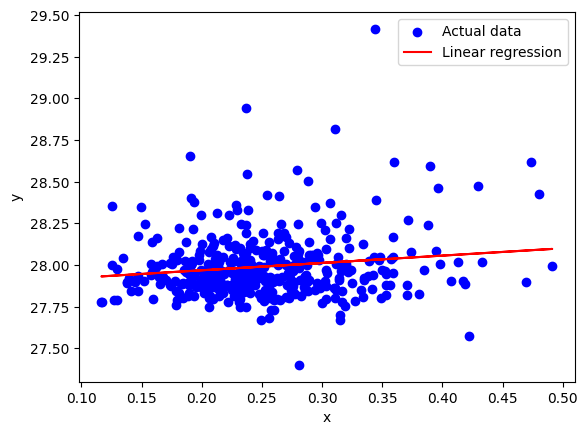

In [ ]:
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_pred, color='red', label='Linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
